## Implementation of:
* The mahalanobis distance function
* Calculate_u for possibilistic k-means

## GOAL:
### Homework: Implement possibilistic k-means

Goal:
1. Implement the mahalanobis_distance function.
2. Implement the calculate_eta function.
3. Implement the calculate_u.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

|**Aircraft name** | **Distance range (km)** | **Seats count** | **Aircraft type** |
|------------------|-------------------------|-----------------|-------------------|
| Cesna 510 Mustang| 1940                    |             4   | private jet       |
| Falcon 10/100    | 2960                    |             9   | private jet       |
| Hawker 900/900XP | 4630                    |             9   | private jet       |
| ATR 72-600       | 1528                    |            78   | medium size aircraft|
| Bombardier Dash 8 Q400 | 2040              |            90   | medium size aircraft|
| Embraer ERJ145 XR| 3700                    |            50   | medium size aircraft|
| Boeing 747-8     | 14815                   |           467   | jet airliner      |
| A380-800         | 15200                   |           509   | jet airliner      |
| Boeing 787-8     | 15700                   |           290   | jet airliner      |
| Boeing 737-900ER | 6045                    |           215   | jet airliner      | 

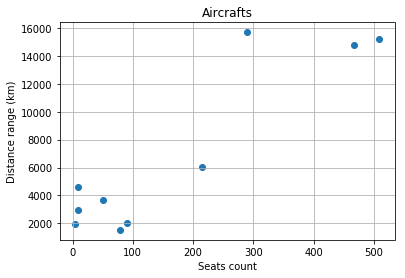

In [2]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [3]:
data = np.array(X)
X_norm = data/data.max(0)

In [4]:
print(X_norm)

[[ 0.00785855  0.12356688]
 [ 0.01768173  0.18853503]
 [ 0.01768173  0.29490446]
 [ 0.15324165  0.09732484]
 [ 0.17681729  0.12993631]
 [ 0.09823183  0.23566879]
 [ 0.91748527  0.94363057]
 [ 1.          0.96815287]
 [ 0.5697446   1.        ]
 [ 0.42239686  0.38503185]]


## Fuzzy k-means

In [5]:
centers = []
groups = 2 

def select_centers():
    global centers
    global groups
    
    counter = 0
    while counter < groups:
        centers.append((random.random(), random.random()))
        counter += 1
select_centers()

In [6]:
data_set = X_norm

m = 2.0
error_margin = 0.01

assignation=np.zeros((len(X),groups))
centers=[]
select_centers()

In [7]:
def calculate_distance(x,v):
    return math.sqrt((x[0]-v[0])**2+(x[1]-v[1])**2)

In [8]:
def calculate_new_centers(u):
    global centers
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers

In [9]:
def calculate_differences(new_assignation):
    global assignation    
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

In [10]:
def calculate_u(x,i):
    global centers
    if i == 0:
        sum=1.0+(calculate_distance(x, centers[0])/calculate_distance(x, centers[1]))**2
    else:
        sum=1.0+(calculate_distance(x, centers[1])/calculate_distance(x, centers[0]))**2
    return sum**-1

In [11]:
print(centers)

[(0.1431550842947421, 0.8718151968221924), (0.643669758221887, 0.9745834587359893)]


In [12]:
def cluster():
    global assignation    
    global error_margin    
    global groups
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation_vector=[]
            for k in range(groups):
                new_assignation_vector.append(calculate_u(data_set[i],k))
            new_assignation.append(new_assignation_vector)
        calculate_new_centers(new_assignation)

        if iter>0:
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

In [13]:
cluster()

In [14]:
print(centers)

[array([ 0.1124021 ,  0.19895626]), array([ 0.83354829,  0.96018437])]


In [15]:
print(assignation)

[[0.9881297751471932, 0.01187022485280676], [0.9928586719632815, 0.007141328036718628], [0.983860644249144, 0.016139355750856045], [0.9901617330870529, 0.009838266912947187], [0.9921052273989537, 0.007894772601046285], [0.9985472103114951, 0.0014527896885049147], [0.006068076982786611, 0.9939319230172134], [0.019766661303278678, 0.9802333386967212], [0.07711114759077196, 0.922888852409228], [0.792567947111039, 0.20743205288896097]]


In [16]:
red = X_norm[np.where(np.array(assignation)[:,0]>0.5)]
blue = X_norm[np.where(np.array(assignation)[:,1]>0.5)]

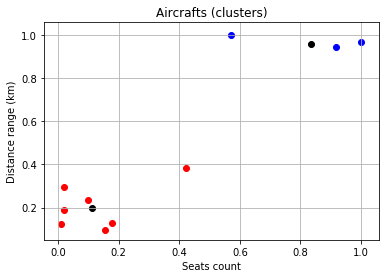

In [17]:
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()

## Possibilistic K-means

In [18]:
data_set = X_norm

error_rate = 0.01
m = 2.0
groups = 2
assignation = np.random.rand(len(X), groups)

In [19]:
print(assignation)

[[ 0.00988264  0.57442739]
 [ 0.65975375  0.67088012]
 [ 0.80014957  0.65514621]
 [ 0.73966782  0.9642712 ]
 [ 0.05630767  0.92799352]
 [ 0.27520103  0.01862791]
 [ 0.00196489  0.8930791 ]
 [ 0.62347303  0.20636175]
 [ 0.36319806  0.25836037]
 [ 0.76838583  0.06891387]]


Select centers randomly

In [20]:
centers = []

def select_centers():
    global centers
    global groups
    
    counter = 0
    while counter < groups:
        centers.append((random.random(), random.random()))
        counter += 1
select_centers()

In [21]:
print(centers)

[(0.48386058040290925, 0.7258931432994293), (0.19593635844854296, 0.5825879541673041)]


In [22]:
def calculate_new_centers(u):
    global centers
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers

#### Calculate mahalanobis distance:

\begin{equation}
 d =  \sqrt{(x - v)^T * C^{-1} * (x - v)}   ,
\end{equation}

where C is a covariance matrix

In [23]:
def mahalanobis_distance(point, center, cov_inv):
    assert len(point) == 2, "mahal_dist function is defined for 2 dimensional elements"
    assert len(center) == 2, "mahal_dist function is defined for 2 dimensional elements"
#     diff = np.subtract(x, v)
#     arr = np.vstack([x, v])
#     covariance = np.cov(arr.T)
#     cov_inv = np.linalg.inv(covariance)
    x = np.asarray(point)
    y = np.asarray(center)
    diff = np.subtract(point, center)
    distance = np.dot(np.dot(diff, cov_inv), diff.T)
    if distance > 0:
        distance = math.sqrt(distance)
    else:
        print("Something is wrong, the value should be positive to allow square operation")
    return distance

#### Calculate assignation matrix in possibilistic k-means (PCM):
    
\begin{equation}
 \mu_{ik}= (1 + (\frac {D_{ikA}} {\eta_i}) ^ \frac {2} {m-1} ) ^{-1},
\end{equation}

Where possibilistic distribution measure:

\begin{equation}
 \eta_i = \frac {\sum_{k=1}^{M}(\mu_{ik})^m D_{ikA}^2} {\sum_{k=1}^{M}(\mu_{ik})^m},
\end{equation}

and 

\begin{equation}
 D_{ikA}^2 = \|x_k - v_i\|_A^2 = (x_k - v_i)^T A (x_k - v_i)
\end{equation}



I'm guessing this distance D is exactly *mahalanobis_distance*

In [24]:
def calculate_eta(u, cov_inv):
    global m
    global centers
    global groups
    
    eta = []
    for i in range(len(data_set)):
        numerator = 0.0
        denominator = 0.0
        for g in range(groups):
#             numerator += (u[i][g] ** m) * (mahalanobis_distance(g, i) ** 2)
            numerator += (u[i][g] ** m) * (mahalanobis_distance(data_set[i], centers[g], cov_inv) ** 2)
            denominator += (u[i][g] ** m)
        eta.append(np.divide(numerator, denominator))
    return eta

In [25]:
def calculate_u(distance, eta):
    global centers
    global m
    fraction = np.divide(distance, eta)
    result = 1 + fraction ** (2 / (m - 1))
    return result ** (-1)

In [33]:
def calculate_differences(new_assignation):
    global assignation    
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

In [34]:
def cluster():
    global assignation
    global error_rate
    global groups
    difference_limit_not_achieved = True
    iters = 0
    
    arr = np.asarray(data_set).T
    C_matrix = np.cov(arr)
    C_inv = np.linalg.inv(C_matrix)
    
    while difference_limit_not_achieved:
        new_assignation = []
        eta = calculate_eta(assignation, C_inv)
        
        for i in range(len(data_set)):
            new_assignation_vector=[]
            
            for g in range(groups):
                distance = mahalanobis_distance(data_set[i], centers[g], C_inv)
                new_assignation_vector.append(calculate_u(distance, eta[i]))

            new_assignation.append(new_assignation_vector)  
        calculate_new_centers(new_assignation)
        
        if iters > 0:
            if calculate_differences(new_assignation) < error_rate:
                difference_limit_not_achieved = False
        assignation = new_assignation
        iters+=1

In [35]:
cluster()

In [36]:
print(centers)

[array([ 0.41139142,  0.52704686]), array([ 0.41125239,  0.52691797])]


In [37]:
print(assignation)

[[0.54534587994007966, 0.54554824731995755], [0.52784743258306654, 0.52805853935980906], [0.63727685524836575, 0.63739938989804379], [0.66213029952105951, 0.66220466340347095], [0.63134267167748781, 0.63142324015485252], [0.41010809963873496, 0.41037126424762899], [0.6565815623516108, 0.65643790711142869], [0.74024550077996643, 0.74015036483611552], [0.81700762701033181, 0.81699314588548266], [0.47996409607108836, 0.47996269459151802]]


In [38]:
red = X_norm[np.where(np.array(assignation)[:,0]>0.5)]
blue = X_norm[np.where(np.array(assignation)[:,1]>0.5)]

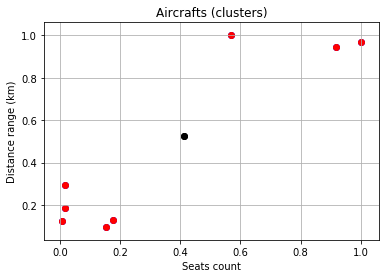

In [39]:
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()
